In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!pip install -q tensorflow_hub
!pip install pydot graphviz
!pip install pydot3 pydot-ng

In [2]:
from IPython.display import SVG
from keras.applications.inception_v3 import InceptionV3
from keras.utils.vis_utils import model_to_dot
inception_model = InceptionV3(weights='imagenet', include_top=False)
#SVG(model_to_dot(inception_model).create(prog='dot', format='svg'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# check the layers by name
for i,layer in enumerate(inception_model.layers):
    print(i,layer.name)


In [5]:
from keras.preprocessing.image import ImageDataGenerator
data_train= '/content/drive/My Drive/maps/train'
data_test = '/content/drive/My Drive/maps/test'

image_size=299

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 20
val_batchsize = 40
 
train_generator = train_datagen.flow_from_directory(
        str(data_train),
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

for image_batch,label_batch in train_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 360 images belonging to 4 classes.
Image batch shape:  (20, 299, 299, 3)
Labe batch shape:  (20, 4)


In [6]:
test_generator = validation_datagen.flow_from_directory(
        str(data_test),
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
for image_batch,label_batch in test_generator :
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 40 images belonging to 4 classes.
Image batch shape:  (40, 299, 299, 3)
Labe batch shape:  (40, 4)


In [9]:
import random
import cv2
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import SGD
import numpy as np

inc_model = InceptionV3(weights='imagenet', include_top=False)

# get layers and add average pooling layer
x = inc_model.output
x = GlobalAveragePooling2D()(x)

# add fully-connected layer
x = Dense(512, activation='relu')(x)

# add output layer
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=inc_model.input, outputs=predictions)

# freeze pre-trained model area's layer
for layer in inc_model.layers:
    layer.trainable = False

# update the weight that are added
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# choose the layers which are updated by training
layer_num = len(model.layers)
for layer in model.layers[:279]:
    layer.trainable = False

for layer in model.layers[279:]:
    layer.trainable = True
    
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, None, None, 3 96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, None, None, 3 0           batch_normalization_283[0][0]    
__________________________________________________________________________________________________
conv2d_284

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [11]:
from keras import models
from keras import layers
from keras import optimizers

# training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
#Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size ,
      epochs=18,
      validation_data=test_generator,
      validation_steps=test_generator.samples//test_generator.batch_size,
      verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/18
18/18 [==============================] - 36s 2s/step - loss: 0.9690 - acc: 0.6167 - val_loss: 1.1487 - val_acc: 0.4750
Epoch 2/18
18/18 [==============================] - 15s 819ms/step - loss: 0.4483 - acc: 0.8778 - val_loss: 1.1291 - val_acc: 0.6000
Epoch 3/18
18/18 [==============================] - 18s 985ms/step - loss: 0.2971 - acc: 0.8944 - val_loss: 1.1534 - val_acc: 0.6000
Epoch 4/18
18/18 [==============================] - 18s 1s/step - loss: 0.2200 - acc: 0.9389 - val_loss: 1.3806 - val_acc: 0.6000
Epoch 5/18
18/18 [==============================] - 18s 990ms/step - loss: 0.1730 - acc: 0.9667 - val_loss: 1.3901 - val_acc: 0.5500
Epoch 6/18
18/18 [==============================] - 19s 1s/step - loss: 0.1159 - acc: 0.9667 - val_loss: 1.6053 - val_acc: 0.4750
Epoch 7/18
18/18 [==============================] - 19s 1s/step - loss: 0.1271 - acc: 0.9639 - val_loss: 1.6200 - val_acc: 0.5500
Epoch 8/18
18/18 [===============

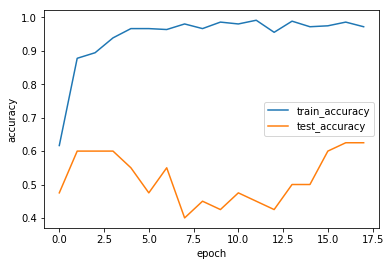

In [12]:
import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(history)

In [17]:
loss=model.evaluate_generator(test_generator, 
                              steps=4,
                              verbose=1)
loss

4/4 [==============================] - 4s 1s/step


[2.326415777206421, 0.625]